# Documentation (By example)

Here, we will see how and if the BM code works by going through some concrete examples. The Boltzmann Machine is written as a class named BoltzmannM() in the file BM.py. As with any class, we first have to initialise it to do anything with it!

### Initialise the Boltzmann machine
bm = BM.BoltzmannM(no_vis, no_hid = 0, restr = 0, **kwargs)

__INPUT__ <br>
&nbsp;&nbsp;&nbsp;&nbsp;__no_vis__  :   no of visible neurons<br>
&nbsp;&nbsp;&nbsp;&nbsp;__no_hid__   : no. of hidden neurons<br>
&nbsp;&nbsp;&nbsp;&nbsp;__restr__       : BOOL value (1: restricted BM, 0: non-restricted BM (Default)) <br>
&nbsp;&nbsp;&nbsp;&nbsp;__W__           : (symmetric matrix with diagonal = 0) matrix connection weights. Size: (no_vis+no_hid)*(no_vis+no_hid). <br>
&nbsp;&nbsp;&nbsp;&nbsp;__bias__        : bias vector (size (no_vis+no_hid)x1) (Default: each bias initialised uniformly randomly between -1 and 1.)<br>
&nbsp;&nbsp;&nbsp;&nbsp;__init_state__  : (vector of size (no_vis + no_hid)x1) initial state of the BM. <br>
__Additional Info__
__W__ has to be a symmetric matrix with 0 on the diagonal (since neurons are not connected to themselves). In the case of a restricted BM, visible neurons are not connected to each other and hidden units are neither. This greatly increases learning speed. <br><br>

Below we first import BM (BM.py from this github repo) which contains the BoltzmannM class. We initialise the BM with 28*28 visible units since we would like to train it on the MNIST dataset for handwritten digits (see below). We choose to have the same number of hidden units (for no particular reason):

In [4]:
"Initialization of BM"
import BM
import numpy as np

no_vis = 28*28 # No of visible neurons
no_hid = 28*28 # No of hidden neurons (default 0)
bm = BM.BoltzmannM(no_vis, no_hid = no_hid, initial_state=np.ones(no_vis+no_hid), restr = 1)

### Train Boltzmann Machine with Binary Data
The Boltzmann machine can only be trained with binary datasets. For training, we use the method __learn__: <br>

bm.learn(data, it = 600, alphaW = 0.03, alphab = 0.03) <br>

__INPUT__ <br>
&nbsp;&nbsp;&nbsp;&nbsp;__data__  : list of datasamples. Each datasample is a 1D list of its own.<br>
&nbsp;&nbsp;&nbsp;&nbsp;__it__  : number of iterations. Each iteration step, the BM estimates its expectation values $\langle s_i s_j \rangle_{model}$ and $\langle s_i \rangle_{model}$ and updates its connection matrix and biases (see notebook "Boltzmann machine"). <br>
&nbsp;&nbsp;&nbsp;&nbsp; __alphaW__ : learning rate for connection matrix <br>
&nbsp;&nbsp;&nbsp;&nbsp; __alphab__ : learning rate for biases <br>

__data__ : 2D list. Each row of the list is one dataset, i.e. one state vector.
Optional: Set no. of iterations and learning rate step-size (alphaW for weight matrix and alphab for biases).

bm.learn(data, it = 1000, alphaW = 0.03, alphab = 0.03)

In this example we use the MNIST dataset for handwritten digits. You can download the dataset by going to the [github project](https://github.com/sorki/python-mnist) and following the instructions there: <br>
\$git clone https://github.com/sorki/python-mnist <br>

\$cd python-mnist/bin <br>

\$./mnist_get_data.sh <br>

In [ ]:
bm.learn(data, it = 1000, alphaW = 0.03, alphab = 0.03)

### MNIST dataset
The MNIST dataset is a freely available dataset of 60,000 handwritten digits. You can download the dataset by going to the [github project](https://github.com/sorki/python-mnist) and following the instructions on the github page. Since the MNIST data is not binarized we will have to do that before training the boltzmann machine. After installing MNIST on your PC you can binarize the images like so:

In [16]:
from mnist import MNIST
mndata = MNIST('python-mnist/data')
mndata.gz = False
images, labels = mndata.load_training()

images_bin = images.copy()
for row in range(len(images_bin)):
    digit = [0 if i<=30 else 1 for i in images_bin[row]]
    images_bin[row] = digit

del images

Let's check out the first image in the binarized image set:

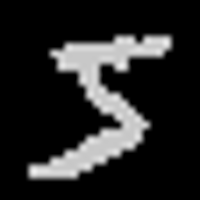

In [17]:
from PIL import Image
imvec = np.reshape(images_bin[0], (28,28)).tolist()
i=Image.fromarray(np.array(imvec, dtype=np.uint8)*200,"L")
i = i.resize((200,200))
display(i)

Looks alright, doesn't it?